In [44]:
#Batuhan Ozdemir 28332
#DSA210 Youtube History project


import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud



In [45]:
# Load watch history JSON
with open('izleme geçmişi.json', 'r', encoding='utf-8') as file:
    watch_history = json.load(file)

# Load subscriptions CSV
subscriptions = pd.read_csv('abonelikler.csv')

# Display sample data
print(f"Number of watch history records: {len(watch_history)}")
print("Sample watch history:")
print(watch_history[:2])
print("\nSample subscriptions data:")
print(subscriptions.head())


Number of watch history records: 5755
Sample watch history:
[{'header': 'YouTube', 'title': '100 Adet İKON PAKETİ Açtım! | EA\xa0FC\xa025 adlı videoyu izlediniz', 'titleUrl': 'https://www.youtube.com/watch?v=bAzMwAtvt0g', 'subtitles': [{'name': 'zgocbrayt', 'url': 'https://www.youtube.com/channel/UCmpona9Y9zKtkyVXS7QGJSA'}], 'time': '2024-12-28T18:10:51.981Z', 'products': ['YouTube'], 'activityControls': ['YouTube izleme geçmişi']}, {'header': 'YouTube', 'title': "Polaroid Go Generation 2 Review - The world's smallest instant camera adlı videoyu izlediniz", 'titleUrl': 'https://www.youtube.com/watch?v=3T7lIp0LQqA', 'subtitles': [{'name': 'iJustine', 'url': 'https://www.youtube.com/channel/UCey_c7U86mJGz1VJWH5CYPA'}], 'time': '2024-12-28T17:47:40.831Z', 'products': ['YouTube'], 'activityControls': ['YouTube izleme geçmişi']}]

Sample subscriptions data:
              Kanal Kimliği  \
0  UC-8kfV7WgDqANSowp5dw0OQ   
1  UC-lHJZR3Gqxm24_Vd_AJ5Yw   
2  UC1iDepXNjQe06-UO8KwgmFw   
3  UC1njwki

In [4]:
# Convert time to a datetime format, handling inconsistent formats
watch_history_df['time'] = pd.to_datetime(
    watch_history_df['time'], errors='coerce'
)

# Check for any rows where the conversion failed
invalid_times = watch_history_df[watch_history_df['time'].isna()]
if not invalid_times.empty:
    print("Rows with invalid times:")
    print(invalid_times)

# Drop rows with invalid time data
watch_history_df = watch_history_df.dropna(subset=['time'])

# Display cleaned DataFrame
print(f"Cleaned watch history data (total records: {len(watch_history_df)}):")
watch_history_df.head()


Rows with invalid times:
                                                  title            channel  \
1358  FM24 Ekiple Draft #1| KURAL : 5 BÜYÜK LİG YOK ...            HTalks    
1539  ESKİ FBI AJANI | AMERİKALI AYNASIZ | SARSILMAZ...          SARSILMAZ   
2151  USTA DEMİRCİ / Ghost of Tsushima / BÖLÜM #7 ad...             pc man   
3203  KUT b2b METE | CLIPROOM: Xmas @KLEIN adlı vide...    Clip Experience   
3270  Zade ve Eren Aktan Sohbet Yayını. adlı videoyu...          DaVinciTW   
3465  Akai MPC One: Making a Beat (SAMPLE) adlı vide...  r2gII Productions   
4491  1 Kill with every gun in Battlefield 2042... a...          jackfrags   
4640  Andre Power | Boiler Room London: Soulection a...        Boiler Room   
5263  Stephen Curry Goes Sneaker Shopping With Compl...            Complex   
5750  ARTIK HERKES HACKER OLACAK w/@orkunisitmak adl...          Can Deger   

                                              url time  
1358  https://www.youtube.com/watch?v=YyL28IEtlI0  NaT  
15

,title,channel,url,time
0,100 Adet İKON PAKETİ Açtım! | EA FC 25 adlı vi...,zgocbrayt,https://www.youtube.com/watch?v=bAzMwAtvt0g,2024-12-28 18:10:51.981000+00:00
1,Polaroid Go Generation 2 Review - The world's ...,iJustine,https://www.youtube.com/watch?v=3T7lIp0LQqA,2024-12-28 17:47:40.831000+00:00
2,Introducing the Polaroid Go Generation 2 adlı ...,Polaroid,https://www.youtube.com/watch?v=9g3OCuw-2j8,2024-12-28 17:47:03.087000+00:00
3,BU ÜLKEDE VERGİ YOK ve HER ŞEY ÇOK UCUZ | TAŞK...,Ugur Kola,https://www.youtube.com/watch?v=Ka1abnySK2I,2024-12-28 15:22:51.158000+00:00
4,"Özbekistan'da İlk Günüm! (Taşkent Pazarı, Soka...",Arda Pazır,https://www.youtube.com/watch?v=cajhex56YDE,2024-12-28 15:20:36.903000+00:00


In [5]:
# Check and clean subscriptions data
print(f"Number of subscriptions: {len(subscriptions)}")
subscriptions.columns = subscriptions.columns.str.strip()  # Remove extra spaces in column names
print("\nCleaned subscription data:")
subscriptions.head()


Number of subscriptions: 78

Cleaned subscription data:


,Kanal Kimliği,Kanal URL'si,Kanal Başlığı
0,UC-8kfV7WgDqANSowp5dw0OQ,http://www.youtube.com/channel/UC-8kfV7WgDqANS...,Melisa Kıpçak
1,UC-lHJZR3Gqxm24_Vd_AJ5Yw,http://www.youtube.com/channel/UC-lHJZR3Gqxm24...,PewDiePie
2,UC1iDepXNjQe06-UO8KwgmFw,http://www.youtube.com/channel/UC1iDepXNjQe06-...,Ahmet Soruç
3,UC1njwkiCIpCzt0MEtU5JJUA,http://www.youtube.com/channel/UC1njwkiCIpCzt0...,Krdş twitch bura ne bekli10
4,UC26buublzO30XpR-KP2TfAw,http://www.youtube.com/channel/UC26buublzO30Xp...,webtekno



Top 10 most-watched channels:
channel
Crossover Talks    420
Boiler Room        200
Eren Aktan         144
zgocbrayt          126
Clip Experience     92
Jahistan            63
Dedeler Sofrası     57
Tuna Tavus          53
Jahrein             49
Naaptın             46
Name: count, dtype: int64


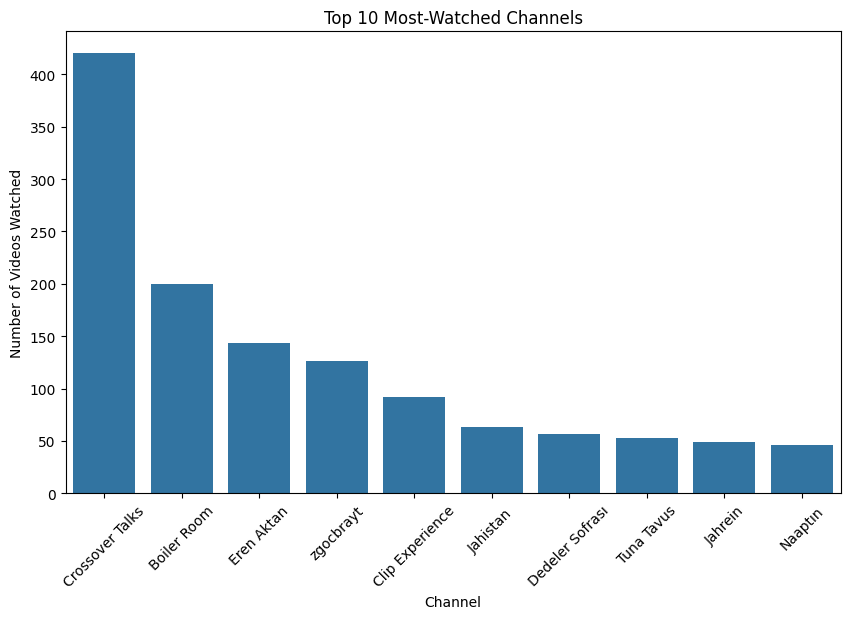

In [48]:
# Count the frequency of channels
channel_counts = watch_history_df['channel'].value_counts()

# Display the top 10 most-watched channels
print("\nTop 10 most-watched channels:")
print(channel_counts.head(10))

# Visualize the top channels
plt.figure(figsize=(10, 6))
sns.barplot(x=channel_counts.head(10).index, y=channel_counts.head(10).values)
plt.title('Top 10 Most-Watched Channels')
plt.xlabel('Channel')
plt.ylabel('Number of Videos Watched')
plt.xticks(rotation=45)
plt.show()


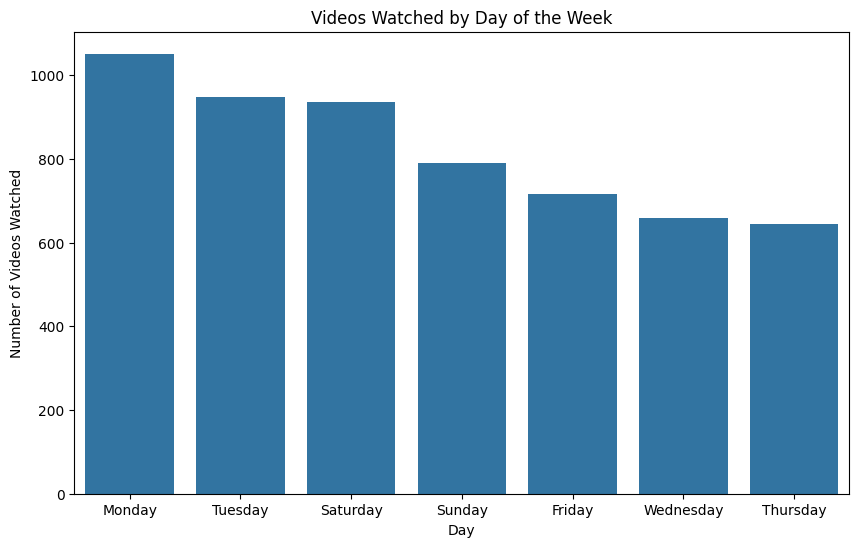

In [49]:
# Viewing trends by day of the week
watch_history_df['day_of_week'] = watch_history_df['time'].dt.day_name()
day_trends = watch_history_df['day_of_week'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=day_trends.index, y=day_trends.values)
plt.title('Videos Watched by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Number of Videos Watched')
plt.show()


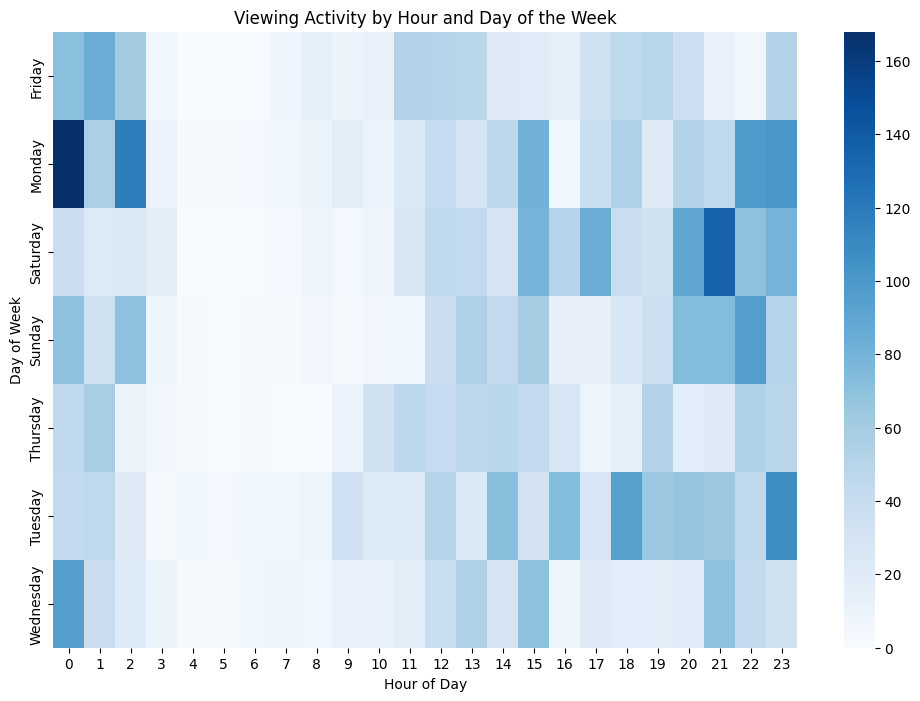

In [50]:
# Hourly trends
watch_history_df['hour'] = watch_history_df['time'].dt.hour
heatmap_data = watch_history_df.groupby(['day_of_week', 'hour']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Blues', annot=False)
plt.title('Viewing Activity by Hour and Day of the Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()


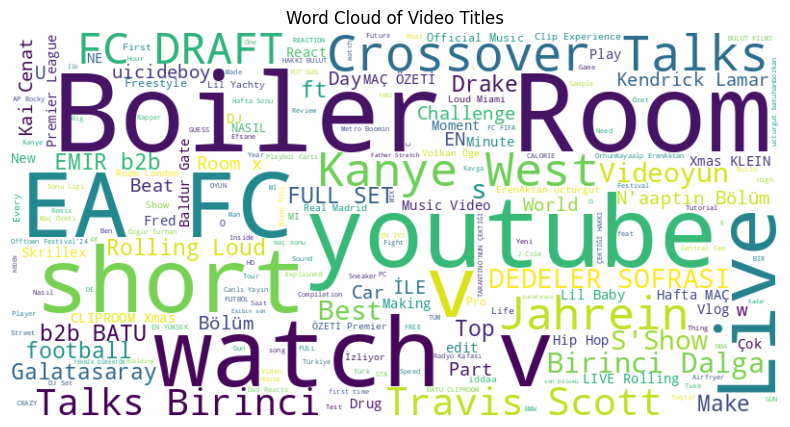

In [51]:
from wordcloud import STOPWORDS

# Define additional stopwords for Turkish and common words
turkish_stopwords = set([
    "adlı", "videoyu", "izlediniz", "ve", "bir", "bu", "ile", "https", "com", "www", "adlı"
])

# Combine with WordCloud's built-in stopwords
custom_stopwords = STOPWORDS.union(turkish_stopwords)

# Combine all titles into a single string
title_text = " ".join(watch_history_df['title'].dropna())

# Generate the word cloud with custom stopwords
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=custom_stopwords
).generate(title_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Video Titles')
plt.show()


In [52]:
categories = {
    "Gaming": [
        "game", "gaming", "play", "draft", "fifa", "minecraft", "valorant",
        "csgo", "league", "legends", "esports", "stream", "overwatch",
        "call of duty", "fortnite", "battle", "rpg", "shooter",
        "oyun", "oyuncu", "takım", "fps", "mobil", "turnuva",
        "toqtir", "x", "w/:"
    ],
    "Food": [
        "recipe", "food", "cooking", "cook", "eat", "restaurant", "kitchen",
        "meal", "dinner", "lunch", "breakfast", "dessert", "snack", "taste",
        "drink", "beverage", "review", "chef",
        "yemek", "tarif", "aşçı", "mutfak", "tatlı", "kahvaltı",
        "öğle", "akşam", "lezzet", "restoran", "sofra", "pişir"
    ],
    "Sports": [
        "football", "basketball", "nba", "match", "goal", "soccer", "tennis",
        "athletics", "olympics", "team", "player", "fifa", "nfl", "mlb", "nhl",
        "workout", "training", "fitness", "fc", "vs", "goal", "draft", "ea",
        "maç", "galatasaray", "fenerbahçe", "süper", "2023", "sonu", "futbol"
    ],
    "Psychology": [
        "mind", "behavior", "psychology", "self-improvement", "mental",
        "emotions", "habits", "therapy", "anxiety", "stress", "depression",
        "happiness", "motivation", "mindset", "counseling", "wellbeing",
        "psikoloji", "zihin", "davranış", "beyin", "mutluluk", "duygu",
        "stres", "anksiyete", "terapi", "alışkanlık", "motivasyon", "rehberlik",
        "life", "her", "erkek"
    ],
    "Technology": [
        "tech", "review", "device", "latest", "gadget", "ai", "robot",
        "smartphone", "computer", "laptop", "apple", "android", "coding",
        "programming", "software", "hardware", "innovation", "science",
        "machine learning", "startup", "teknoloji", "inceleme", "cihaz",
        "robot", "yapay zeka", "telefon", "bilgisayar", "donanım",
        "yazılım", "kodlama", "programlama", "inovasyon", "akıllı", "bilim",
        "top", "xl", "2023"
    ],
    "Music": [
        "music", "song", "track", "remix", "album", "playlist", "hip-hop",
        "dj", "live", "concert", "performance", "festival", "rap", "pop",
        "rock", "instrumental", "cover", "karaoke", "electronic", "edm",
        "boiler", "b2b", "set", "mix", "cliproom", "travis", "kendrick",
        "$uicideboy$", "emir", "performance", "clip", "festival",
        "canlı", "radyo", "kanye", "west"
    ],
    "Travel": [
        "travel", "explore", "trip", "adventure", "vlog", "vacation",
        "journey", "tour", "roadtrip", "holiday", "flight", "backpacking",
        "destination", "hotel", "camping", "hiking", "exploring", "culture",
        "seyahat", "gezi", "tatil", "tur", "macera", "rota", "otel",
        "kültür", "kamp", "dağ", "deniz", "yolculuk", "keşif"
    ],
    "Education": [
        "tutorial", "learn", "study", "lecture", "how to", "lesson", "course",
        "training", "school", "education", "knowledge", "skill", "university",
        "college", "exam", "test", "science", "math", "history",
        "eğitim", "ders", "öğren", "kurs", "konu", "bilgi", "okul",
        "üniversite", "sınav", "test", "bilim", "matematik", "tarih",
        "anlatım", "rehber", "çalışma", "how", "what", "neden", "new"
    ],
    "Entertainment": [
        "bölüm", "season", "episode", "hafta", "dizi", "n'aaptın", "dalga",
        "sketch", "mizah", "comedy", "reaction", "parody", "movie",
        "series", "film", "trailer", "en", "jahrein", "s'show💩", "s'show",
        "çekti̇ği̇", "💩", "tarantino'nun", "fi̇lmi̇!", "film", "özel", "yayın",
        "kavga", "life", "son", "olmasi!", "olmasi", "cringe", "memes"
    ],
    "How-To/DIY": [
        "nasıl", "how-to", "repair", "build", "fix", "hack", "guide",
        "nasil", "tutorial", "setup"
    ],
    "News": [
        "haber", "news", "politics", "interview", "gündem", "world",
        "son dakika", "current", "headlines"
    ],
    "Comedy/Shorts": [
        "funny", "stand-up", "shorts", "viral", "clip", "challenge",
        "xmas", "prank", "humor", "joke"
    ],
    "Fitness/Health": [
        "fit", "health", "workout", "exercise", "diet", "sağlık", "antrenman",
        "training", "gym", "nutrition", "yoga"
    ]
}


In [53]:
def categorize_video(title):
    """
    Categorize a video based on its title.
    """
    title = title.lower()
    for category, keywords in categories.items():
        if any(keyword in title for keyword in keywords):
            return category
    return "Other"

# Apply categorization to the dataset
watch_history_df['category'] = watch_history_df['title'].apply(categorize_video)

# Count the number of items in each category
category_counts = watch_history_df['category'].value_counts()
print("\nNumber of items in each category:")
print(category_counts)

def analyze_other_category(dataframe, stopwords, top_n=10):
    """
    Analyze the "Other" category to find the most common words.

    Args:
        dataframe (pd.DataFrame): The DataFrame containing video titles and categories.
        stopwords (set): A set of stopwords to exclude from the analysis.
        top_n (int): The number of most common words to return.

    Returns:
        list: Most common words in the "Other" category.
    """
    # Filter titles in the "Other" category
    other_titles = dataframe[dataframe['category'] == "Other"]['title']
    all_words = []

    # Tokenize and filter stopwords
    for title in other_titles.dropna():
        tokens = title.lower().split()
        filtered_tokens = [word for word in tokens if word not in stopwords]
        all_words.extend(filtered_tokens)

    # Count the most common words
    word_counts = Counter(all_words)
    return word_counts.most_common(top_n)

# Define stopwords (English, Turkish, and punctuation)
stopwords = set([
    "ve", "bir", "bu", "ile", "da", "de", "mi", "ama", "çok", "gibi", "için",
    "adlı", "videoyu", "izlediniz", "ne", "şu", "ki", "var", "yok", "yani",
    "ben", "sen", "biz", "siz", "onlar", "and", "the", "of", "to", "a", "in",
    "is", "it", "on", "that", "by", "this", "with", "i", "you", "not", "or",
    "be", "are", "as", "was", "at", "so", "if", "but"
] + list(string.punctuation))  # Add punctuation to stopwords

# Analyze the "Other" category and display the top 10 common words
top_words_in_other = analyze_other_category(watch_history_df, stopwords, top_n=10)

# Display the most common words in the "Other" category
print("\nTop 10 most common words in the 'Other' category:")
for word, count in top_words_in_other:
    print(f"{word}: {count}")



Number of items in each category:
category
Gaming            1129
Sports             945
Other              937
Entertainment      823
Music              562
Food               361
Technology         290
Education          283
Psychology         164
Travel             154
How-To/DIY          45
Comedy/Shorts       34
News                13
Fitness/Health       5
Name: count, dtype: int64

Top 10 most common words in the 'Other' category:
for: 18
2: 16
my: 15
3: 14
from: 11
can: 10
ajdar'in: 10
türki̇ye'ye: 10
cri̇nge: 10
olmayi: 10


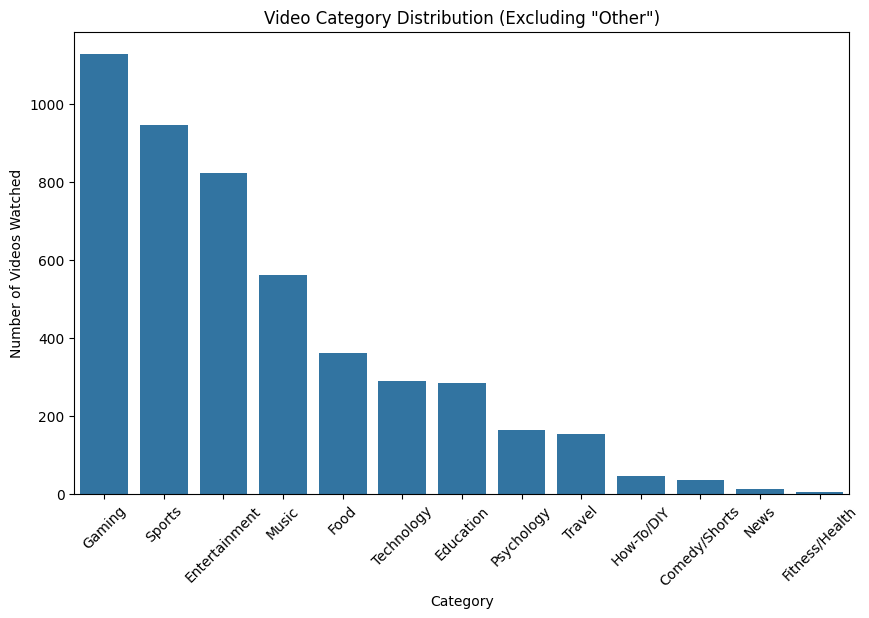

In [54]:
# Recalculate category counts (if not already defined)
category_counts = watch_history_df['category'].value_counts()

# Exclude the "Other" category
filtered_category_counts = category_counts[category_counts.index != "Other"]

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=filtered_category_counts.index, y=filtered_category_counts.values)
plt.title('Video Category Distribution (Excluding "Other")')
plt.xlabel('Category')
plt.ylabel('Number of Videos Watched')
plt.xticks(rotation=45)
plt.show()



Updated Video Category Distribution:
category
Entertainment     1082
Gaming            1016
Sports             909
Other              865
Music              613
Food               356
Education          283
Technology         273
Psychology         129
Travel             122
How-To/DIY          45
Comedy/Shorts       34
News                13
Fitness/Health       5
Name: count, dtype: int64


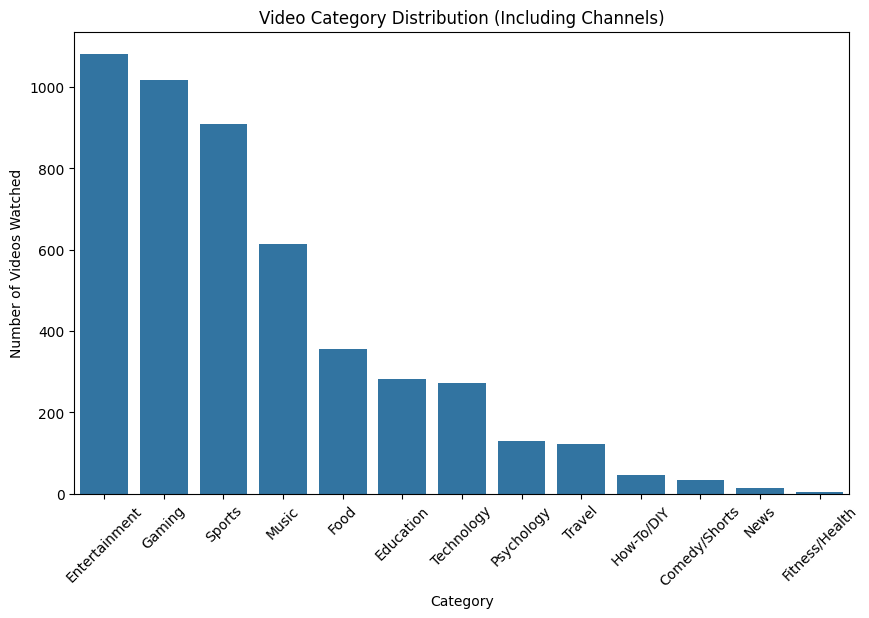

In [56]:
# Add channels to the categories
channel_categories = {
    "Crossover Talks": "Entertainment",
    "Boiler Room": "Music",
    "TED": "Education",
    "NBA": "Sports",
    # Add more channels as needed
}

def categorize_video(title, channel):
    """
    Categorize a video based on its title and channel.
    """
    # Check channel-based categorization
    if channel in channel_categories:
        return channel_categories[channel]

    # Default to title-based categorization
    title = title.lower()
    for category, keywords in categories.items():
        if any(keyword in title for keyword in keywords):
            return category
    return "Other"

# Apply updated categorization logic
watch_history_df['category'] = watch_history_df.apply(
    lambda row: categorize_video(row['title'], row['channel']),
    axis=1
)

# Display updated category distribution
category_counts = watch_history_df['category'].value_counts()
print("\nUpdated Video Category Distribution:")
print(category_counts)

# Visualize category distribution (excluding "Other")
filtered_category_counts = category_counts[category_counts.index != "Other"]

plt.figure(figsize=(10, 6))
sns.barplot(x=filtered_category_counts.index, y=filtered_category_counts.values)
plt.title('Video Category Distribution (Including Channels)')
plt.xlabel('Category')
plt.ylabel('Number of Videos Watched')
plt.xticks(rotation=45)
plt.show()
